In [9]:
import cv2

In [10]:
import matplotlib.pyplot as plt
import numpy as np

training...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.059972387696840546
quantization...
building new image...


C:\Users\cenpes\Anaconda3\envs\Juliana\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: 'shape' argument should be used instead of 'dims'


done.


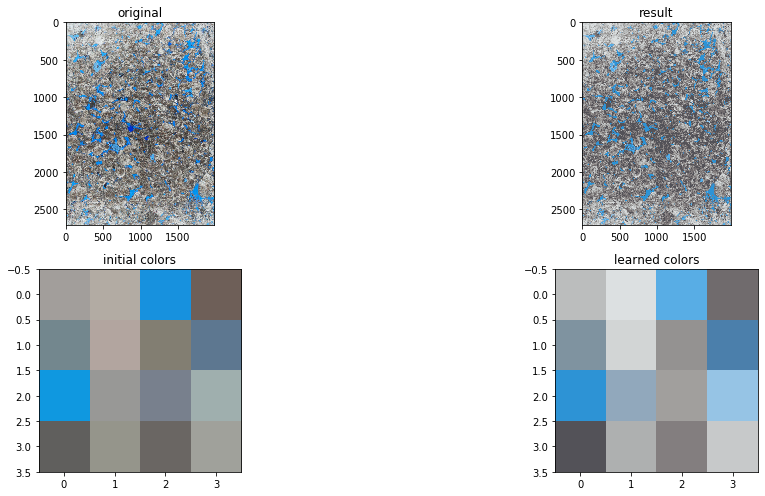

In [11]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# read the image
#img = plt.imread('tree.jpg')
img = plt.imread('D:\\LAMINA\\LAMINASCORTADASATTRITEX_FALSE\\P7-5735-False-GRAINSTONE_2156.tif')

# reshaping the pixels matrix
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3)) / 255.

# SOM initialization and training
print('training...')
som = MiniSom(4, 4, 3, sigma=1.,
              learning_rate=0.2, neighborhood_function='bubble')  # 3x3 = 9 final colors
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train(pixels, 10000, random_order=True, verbose=True)

print('quantization...')
qnt = som.quantization(pixels)  # quantize each pixels of the image
print('building new image...')
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, dims=(img.shape[0], img.shape[1]))] = q
print('done.')

# show the result
plt.figure(figsize=(18, 7))
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(img)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.savefig('C:\\Users\\cenpes\\Desktop\\Pipoca\\som_color_quantization.png')
plt.show()

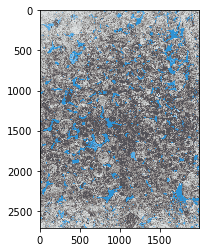

In [12]:
predito = clustered

plt.imshow(predito)
plt.show()


In [13]:
clustered=clustered*255

In [14]:
clustered_1=np.array(clustered, dtype=np.uint8)

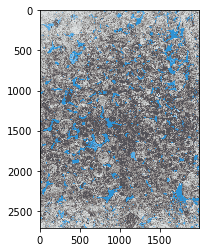

In [15]:
plt.imshow(clustered_1)
plt.show()

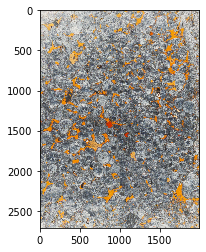

In [16]:
orig = img
orig = cv2.cvtColor(orig, cv2.COLOR_RGB2BGR)
plt.imshow(orig)
plt.show()

In [17]:
def colorDetection(image):
    hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

    '''Red'''
    # Range for lower red
    red_lower = np.array([0,120,70])
    red_upper = np.array([10,255,255])
    mask_red1 = cv2.inRange(hsv, red_lower, red_upper)

    # Range for upper range
    red_lower = np.array([170,120,70])
    red_upper = np.array([180,255,255])
    mask_red2 = cv2.inRange(hsv, red_lower, red_upper)

    mask_red = mask_red1 + mask_red2

    red_output = cv2.bitwise_and(image, image, mask=mask_red)

    red_ratio=(cv2.countNonZero(mask_red))/(image.size/3)

    print("Red in image", np.round(red_ratio*100, 2))



    '''yellow'''
    # Range for upper range
    yellow_lower = np.array([0, 80, 80])
    yellow_upper = np.array([250, 255, 255])
    mask_yellow = cv2.inRange(hsv, yellow_lower, yellow_upper)

    yellow_output = cv2.bitwise_and(image, image, mask=mask_yellow)

    yellow_ratio =(cv2.countNonZero(mask_yellow))/(image.size/3)

    print("Yellow in image", np.round(yellow_ratio*100, 2))
    return mask_yellow,yellow_output

In [18]:
predito_yellow,predito_output=colorDetection(clustered_1)
#real_yellow,real_output=colorDetection(real)

Red in image 0.0
Yellow in image 9.28


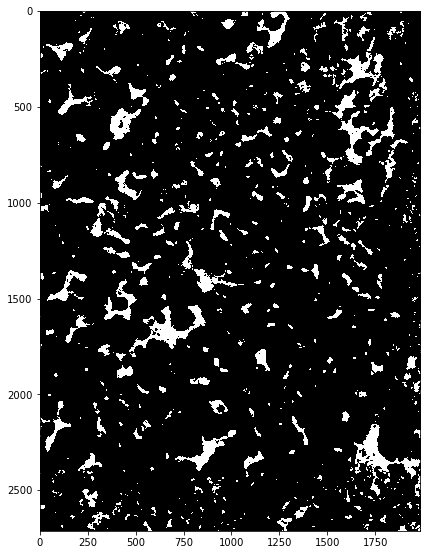

In [19]:
plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.imshow(predito_yellow, cmap="gray")
#plt.subplot(1, 2, 2)
#plt.imshow(real_yellow,cmap="gray")
#plt.show()

#plt.figure(figsize=(15,20))
#plt.subplot(1, 2, 1)
#plt.imshow(predito, cmap="gray")
#plt.subplot(1, 2, 2)
#plt.imshow(real,cmap="gray")
#plt.show()

In [20]:
predito_yellow=np.int64(predito_yellow)

In [21]:
predito_yellow[predito_yellow !=255] = 1
predito_yellow[predito_yellow == 255] = 0


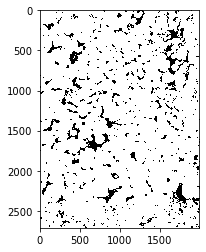

In [22]:
plt.imshow(predito_yellow, cmap="gray")

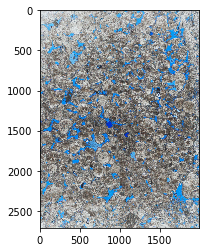

In [25]:
orig = img
plt.imshow(orig)
plt.show()

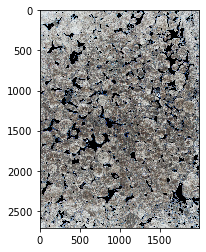

In [26]:
channel_0=orig[:,:,0]*predito_yellow
channel_1=orig[:,:,1]*predito_yellow
channel_2=orig[:,:,2]*predito_yellow
mask_1=cv2.merge((channel_0,channel_1,channel_2))
mask_1=mask_1.astype('uint8')
plt.imshow(mask_1)
plt.show()

In [27]:
mask_1

array([[[201, 210, 215],
        [199, 208, 213],
        [194, 201, 207],
        ...,
        [161, 155, 155],
        [173, 173, 175],
        [162, 169, 177]],

       [[207, 216, 221],
        [206, 215, 220],
        [201, 208, 214],
        ...,
        [168, 162, 162],
        [179, 177, 180],
        [174, 181, 189]],

       [[206, 215, 220],
        [207, 216, 221],
        [204, 211, 217],
        ...,
        [190, 184, 186],
        [201, 199, 202],
        [192, 199, 207]],

       ...,

       [[213, 222, 221],
        [220, 229, 228],
        [226, 235, 234],
        ...,
        [141, 170, 188],
        [152, 184, 199],
        [  0,   0,   0]],

       [[205, 211, 211],
        [210, 216, 216],
        [212, 221, 220],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[193, 199, 199],
        [195, 201, 201],
        [190, 199, 198],
        ...,
        [152, 178, 193],
        [143, 175, 188],
        [  0,   0,   0]]

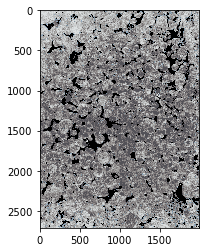

In [28]:
channel_0=predito[:,:,0]*predito_yellow
channel_1=predito[:,:,1]*predito_yellow
channel_2=predito[:,:,2]*predito_yellow
mask=cv2.merge((channel_0,channel_1,channel_2))
plt.imshow(mask)
plt.show()

In [29]:
import matplotlib.image as mpimg
mpimg.imsave("C:\\Users\\cenpes\\Desktop\\Pipoca\\mask_origin_1.png", mask_1)

In [30]:
mask.shape

(2712, 1985, 3)